In [27]:
import numpy as np

# 加载 .npz 文件
file_path = 'pathmnist.npz'  # 请替换为您的文件路径
data = np.load(file_path)

# 探索文件内容
data_sets = data.files
print(data_sets)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [28]:
# 提取训练、验证和测试集
train_images = data['train_images']
val_images = data['val_images']
test_images = data['test_images']
train_labels = data['train_labels']
val_labels = data['val_labels']
test_labels = data['test_labels']

# 打印数据集的细节
print("训练集细节:")
print(f"图像: {train_images.shape}, 标签: {train_labels.shape}")

print("\n验证集细节:")
print(f"图像: {val_images.shape}, 标签: {val_labels.shape}")

print("\n测试集细节:")
print(f"图像: {test_images.shape}, 标签: {test_labels.shape}")

训练集细节:
图像: (89996, 28, 28, 3), 标签: (89996, 1)

验证集细节:
图像: (10004, 28, 28, 3), 标签: (10004, 1)

测试集细节:
图像: (7180, 28, 28, 3), 标签: (7180, 1)


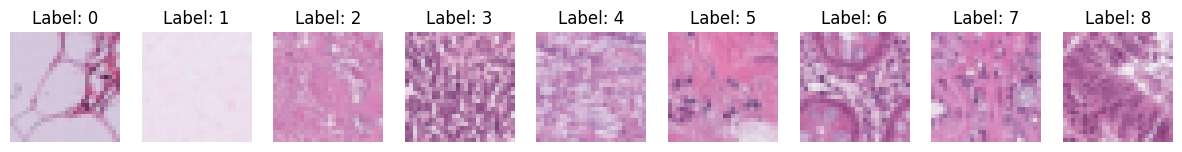

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random
# 获取每个类别的一个随机示例
unique_labels = np.unique(train_labels)
sample_images = []

for label in unique_labels:
    indices = np.where(train_labels == label)[0]
    random_index = random.choice(indices)  # 随机选择一个索引
    sample_images.append(train_images[random_index])

# 可视化每个类别的一个示例
plt.figure(figsize=(15, 15))
for i, image in enumerate(sample_images):
    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(image)
    plt.title(f'Label: {unique_labels[i]}')
    plt.axis('off')

plt.show()

In [33]:
# 归一化训练、验证和测试图像
train_images_normalized = train_images.astype('float32') / 255.0
val_images_normalized = val_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

# 检查归一化后的数据
print("归一化后的数据范围：")
print(f"训练集：{train_images_normalized.min(), train_images_normalized.max()}")
print(f"验证集：{val_images_normalized.min(), val_images_normalized.max()}")
print(f"测试集：{test_images_normalized.min(), test_images_normalized.max()}")


归一化后的数据范围：
训练集：(0.0, 1.0)
验证集：(0.0, 1.0)
测试集：(0.0, 1.0)


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 构建模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 假设有10个类别
])

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(train_images_normalized, train_labels, epochs=10, validation_data=(val_images_normalized, val_labels))




Epoch 1/10


2813/2813 [==============================] - 14s 5ms/step - loss: 1.1060 - accuracy: 0.5868 - val_loss: 0.8363 - val_accuracy: 0.6824
Epoch 2/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.7232 - accuracy: 0.7338 - val_loss: 0.6275 - val_accuracy: 0.7746
Epoch 3/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.6186 - accuracy: 0.7732 - val_loss: 0.5631 - val_accuracy: 0.7977
Epoch 4/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.5333 - accuracy: 0.8059 - val_loss: 0.5278 - val_accuracy: 0.8068
Epoch 5/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.4767 - accuracy: 0.8274 - val_loss: 0.4756 - val_accuracy: 0.8271
Epoch 6/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.4348 - accuracy: 0.8427 - val_loss: 0.4136 - val_accuracy: 0.8503
Epoch 7/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3978 - accuracy: 0.8562 - val_loss: 0.3906 - val

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# 数据预处理
# 将图像数据转换为一维
train_images_flat = train_images.reshape(train_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)

# 归一化图像数据
train_images_normalized = train_images_flat / 255.0
val_images_normalized = val_images_flat / 255.0

# 创建 SVM 分类器
svm_classifier = SVC(kernel='linear')

# 训练 SVM 分类器
svm_classifier.fit(train_images_normalized, train_labels.ravel())

# 预测验证集
val_predictions = svm_classifier.predict(val_images_normalized)

# 计算准确率
accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {accuracy}")
